# Autoencoder + Noise Removal using Tensorflow

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping

In [2]:

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:

noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [4]:
def build_autoencoder():
    input_img = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    return models.Model(input_img, decoded), models.Model(input_img, encoded)

autoencoder, encoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = autoencoder.fit(x_train_noisy, x_train,
                              epochs=30,
                              batch_size=128,
                              shuffle=True,
                              validation_data=(x_test_noisy, x_test),
                              callbacks=[early_stop])

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.3728 - val_loss: 0.2958
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2920 - val_loss: 0.2906
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2873 - val_loss: 0.2872
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2847 - val_loss: 0.2851
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2820 - val_loss: 0.2836
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2806 - val_loss: 0.2826
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2808 - val_loss: 0.2816
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2795 - val_loss: 0.2806
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2781 - val_loss: 0.2800
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2782 - val_loss: 0.2794
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2768 - val_loss: 0.2787
Epoch 12/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/st

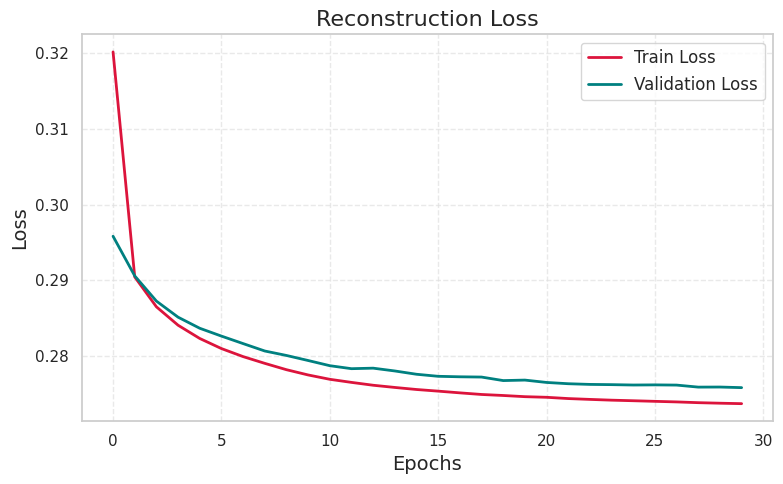

In [6]:
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss', color='crimson', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='teal', linewidth=2)
plt.title('Reconstruction Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', color='#e0e0e0', alpha=0.7)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


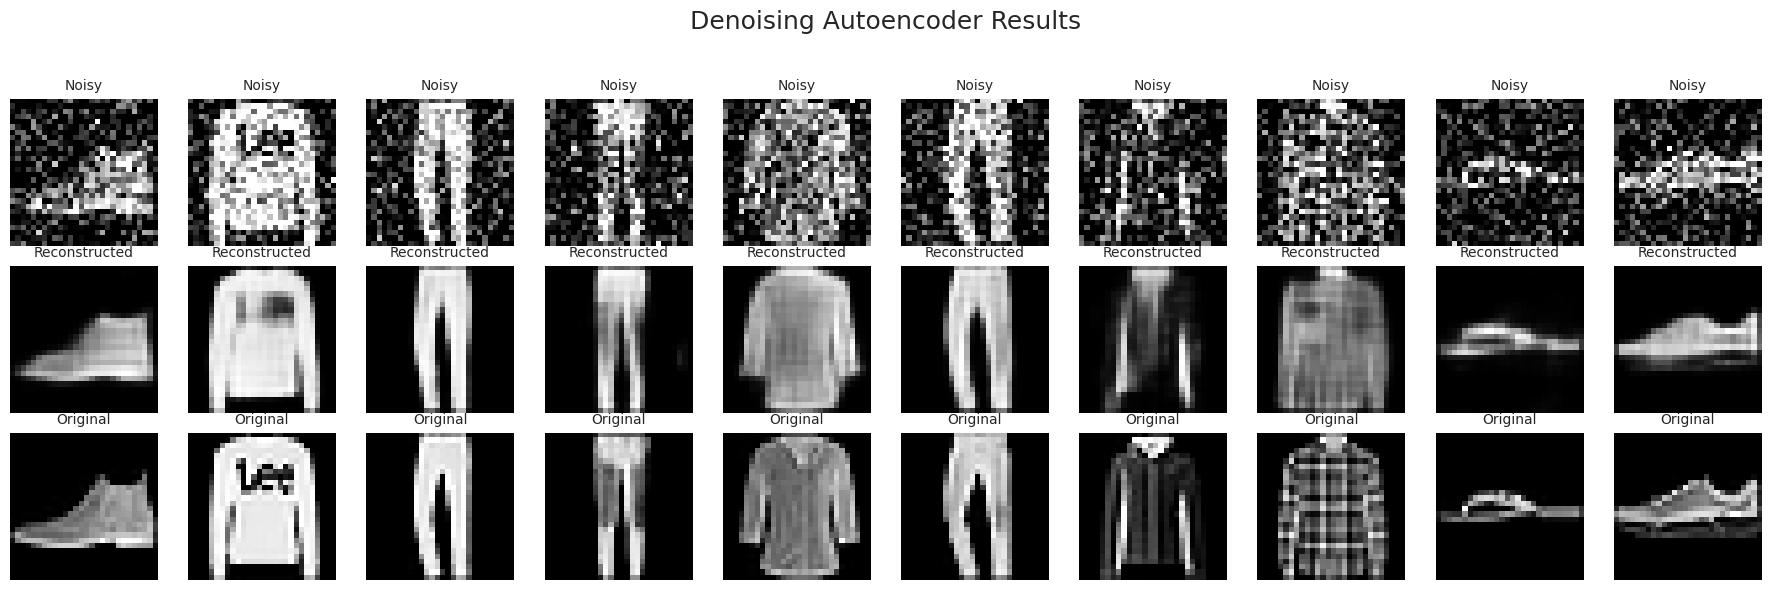

In [7]:
n = 10
decoded_imgs = autoencoder.predict(x_test_noisy[:n])

plt.figure(figsize=(18, 6))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].squeeze(), cmap='gray')
    plt.title("Noisy", fontsize=10)
    plt.axis("off")

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    plt.title("Reconstructed", fontsize=10)
    plt.axis("off")

    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title("Original", fontsize=10)
    plt.axis("off")
plt.suptitle('Denoising Autoencoder Results', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


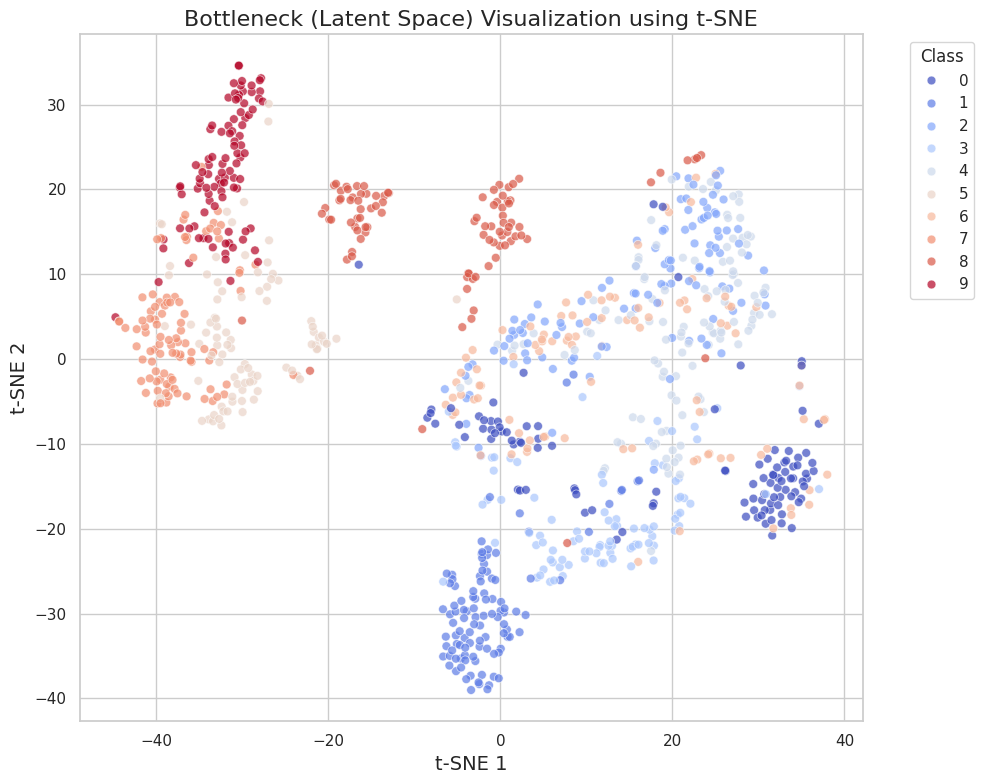

In [8]:
from keras.datasets import fashion_mnist
(_, y_train), (_, y_test) = fashion_mnist.load_data()
encoded_imgs = encoder.predict(x_test[:1000])
encoded_flat = encoded_imgs.reshape(1000, -1)
from sklearn.manifold import TSNE
import seaborn as sns
sns.set(style="whitegrid")
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(encoded_flat)


plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=y_test[:1000], palette='coolwarm', legend='full', s=40, alpha=0.7)
plt.title('Bottleneck (Latent Space) Visualization using t-SNE', fontsize=16)
plt.xlabel('t-SNE 1', fontsize=14)
plt.ylabel('t-SNE 2', fontsize=14)
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


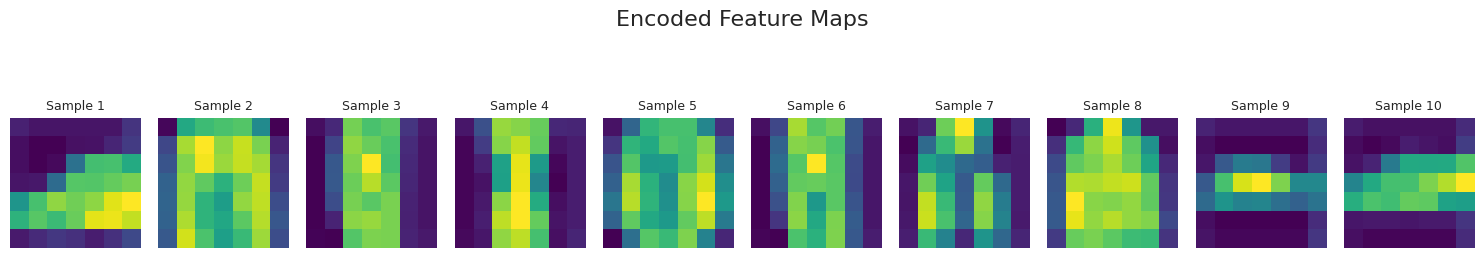

In [9]:
n = 10
encoded_imgs = encoder.predict(x_test[:n])

plt.figure(figsize=(15, 3))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    # 👉 Take the encoded feature map and average over channels for visualization
    feature_map = np.mean(encoded_imgs[i], axis=-1)
    plt.imshow(feature_map, cmap='viridis')
    plt.title(f"Sample {i+1}", fontsize=9)
    plt.axis("off")
plt.suptitle('Encoded Feature Maps', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

# Summary & Analysis

This notebook explores the use of a convolutional denoising autoencoder to clean noisy Fashion MNIST images. Here’s an overview of the approach, model design, and key findings.

## Problem Overview & Methodology
- **Objective:** Automatically remove noise from Fashion MNIST images using a deep learning model.
- **Significance:** Denoising enhances image quality and helps neural networks learn more robust, generalizable features.


## Training Results & Observations
- **Loss Trends:** Training and validation losses both decrease steadily, with little sign of overfitting.
- **Image Restoration:** The autoencoder successfully reconstructs clean images from noisy inputs, preserving important details.
- **Feature Representation:** Visualizations of the encoded space (e.g., t-SNE) show meaningful clustering, indicating the model captures useful abstract features.

## Practical Implications
- **Versatility:** Learned features can support tasks like classification, clustering, or anomaly detection.
- **Broader Use:** The denoising approach is adaptable to other data types, such as medical images or audio signals.

## Final Thoughts
- Convolutional denoising autoencoders are powerful for unsupervised learning and noise reduction.
- The model in this notebook demonstrates strong generalization and produces high-quality, denoised outputs.